In [77]:
#Lets Import Dependencies

import tensorflow_hub as hub 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import cv2

In [78]:
#load the model from here https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2

model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [79]:
#preprocess image and load
def load_images(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img  

In [129]:
content_image = load_images("1615304725224.jpg")
style_image = load_images("romantic.jpg")

In [81]:
#shape of our content image
content_image.shape

TensorShape([1, 1024, 768, 3])

<function matplotlib.pyplot.show>

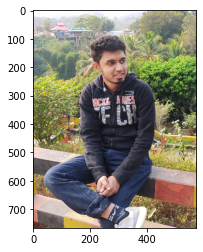

In [100]:
#Let's Visualize the Outputs 

plt.imshow(np.squeeze(content_image))
plt.show

<function matplotlib.pyplot.show>

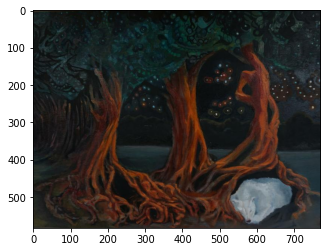

In [93]:
plt.imshow(np.squeeze(style_image))
plt.show

In [130]:
#let's stylize our image

stylization = model(tf.constant(content_image), tf.constant(style_image))
output = stylization[0]

<function matplotlib.pyplot.show>

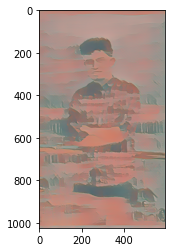

In [131]:
plt.imshow(np.squeeze(output))
plt.show

In [132]:
cv2.imwrite("my_style_theme_1.jpg", cv2.cvtColor(np.squeeze(output)*255, cv2.COLOR_BGR2RGB))

True